<center> <h1> ESCUELA POLITECNICA NACIONAL</h1> 
    <h2> FACULTAD DE INGENIERIA DE SISTEMAS </h2>
    <h2> DATA MINING Y MACHINE LEARNING </h2>
</center>

### **_JOHANNA PAOLA ARIAS SANTILLAN_**
### _GR2CC_2023-1_
### junio del 2023

# Hands On: Data Import and Manipulation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files
# under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved
# as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the
# current session

/kaggle/input/ServiceArea/ServiceArea.csv
/kaggle/input/echocardiogramdata/echocardiogram.data
/kaggle/input/echocardiogram-uci/echocardiogram.csv


## 1. Introduction to Python for Machine Learning

### (a) Create an array of 10 random integers between 1 and 100, and then calculate the mean and standard deviation of the array.

In [2]:
# Create an array of 10 integers between 1 and 100
a = [25, 16, 99, 85, 67, 15]
print('a=',a)
print('Tamaño: ',len(a))
print('Tipo: ',type(a))
# al ser una lista puede tener valores de texto también,
# por lo que buscar un método "mean" para calcular la media no sería posible,
# en cambio para b sí lo es ya que es un array np. y np trabaja solo con números,
# entonces sí se puede traer la media "mean"

# Calculate the mean and standard deviation of the array.
print('Media: ',np.mean(a))
print('Desviacion: ',np.std(a))

a= [25, 16, 99, 85, 67, 15]
Tamaño:  6
Tipo:  <class 'list'>
Media:  51.166666666666664
Desviacion:  33.943171461855016


In [3]:
# Now with random
b = np.random.randint(1, high=101, size=10)
print('b=',b)
print('Longitud: ',len(b))
print('Tipo: ',type(b))
print('Media: ',b.mean())
print('Desviacion:',b.std())

b= [23 91  7 74 31 52 25 50 72 94]
Longitud:  10
Tipo:  <class 'numpy.ndarray'>
Media:  51.9
Desviacion: 28.6511779862539


### (b) Create a 2-dimensional array of 3 rows and 4 columns with random integer values. Then, calculate the sum of each row and column

In [14]:
# Create a 2-dimensional array of 3 rows and 4 columns with random integer values
matrix  = np.random.randint(5, size=(3,4))    # números entre el 0 y el 4, matriz de tamaño 3x4
print(matrix)

# Calculate the sum of each row and column
sumCols = np.sum(matrix, axis=0)
print('Suma de columnas:',sumCols)
sumRows = matrix.sum(axis=1)
print('Suma de filas: \t',sumRows)
# axis: depende de la dimensión de la matriz
# como la matriz es 3x4 la dimensión/eje 0 es 3 (columnas)
# y la dimensión/eje 1 es 4 (filas)

[[4 0 0 0]
 [1 0 3 2]
 [1 2 1 2]]
Suma de columnas: [6 2 4 4]
Suma de filas: 	 [4 6 6]


### (c) Create a DataFrame with 3 columns: "Name", "Age", and "City". Add at least 5 rows of data to the DataFrame. Then, filter the DataFrame to only include rows where the person's age is greater than or equal to 30.

In [41]:
# Create a DataFrame with 3 columns: "Name", "Age", and "City".
df = pd.DataFrame()
df['Name'] = None
df = df.assign(Age=None)          # otra manera de agregar columnas al df
df['City'] = None

print('Data Frame vacio\n',df)

# Add at least 5 rows of data to the DataFrame.
# con listas
names = ['Judith','Johanna','Jonathan', 'Javier', 'Jessenia']
ages = [47,27,26,24,22]
cities = ['Quito','Cuenca','Loja','Manabi','Ibarra']

df['Name'] = names
df['Age'] = ages
df['City'] = cities

# con un diccionario
newRow = { 'Name': 'Luis', 'Age': 45,'City': 'Guayaquil'}
# df = df.append(newRow, ignore_index=True)  #ignora el índice cuando por ejemplo los datos vienen de otro dataframe que sí tiene índice
        # append funciona pero es obsoleto, en su lugar usar concat:
df = pd.concat([df, pd.DataFrame(newRow, index=[0])], ignore_index=True)   # ignore_index=True genera nuevos índices para las filas agregadas
# concatena el dataframe df con un nuevo dataframe que contiene la fila newRow

# con un objeto Series
newRow = pd.Series(['Andres', 26, 'Esmeraldas'], index=df.columns)         # toma las columnas del df para no escribirlas manualmente
df = pd.concat([df, pd.DataFrame([newRow])], ignore_index=True)

print('\nData Frame llenado:\n',df)

# Filter: only include rows where the person's age is greater than or equal to 30.
greaterEqual = df['Age'] >= 30
dfWithFilter = df[greaterEqual]

print('\nData Frame filtrado:\n',dfWithFilter)

Data Frame vacio
 Empty DataFrame
Columns: [Name, Age, City]
Index: []

Data Frame llenado:
        Name  Age        City
0    Judith   47       Quito
1   Johanna   27      Cuenca
2  Jonathan   26        Loja
3    Javier   24      Manabi
4  Jessenia   22      Ibarra
5      Luis   45   Guayaquil
6    Andres   26  Esmeraldas

Data Frame filtrado:
      Name  Age       City
0  Judith   47      Quito
5    Luis   45  Guayaquil


### (d) Load a CSV file into a DataFrame and then calculate the mean, median, and mode of one of the columns in the DataFrame. 

In [43]:
# Load a CSV file into a DataFrame
serviceArea = pd.read_csv('/kaggle/input/ServiceArea/ServiceArea.csv')
# file = pd.read_csv('../Hands-On-01/data/ServiceArea.csv')     # ruta en GitHub
print(serviceArea)

# Calculate the mean, median, and mode of one of the columns in the DataFrame
print('La media es:\t', serviceArea['BusinessYear'].mean())
print('La mediana es:\t', serviceArea['BusinessYear'].median())
print('La moda es:\t', serviceArea['BusinessYear'].mode())

       BusinessYear StateCode  IssuerId SourceName  VersionNum  \
0              2014        PA     22444       HIOS           9   
1              2014        PA     22444       HIOS           9   
2              2014        PA     22444       HIOS           9   
3              2014        PA     22444       HIOS           9   
4              2014        PA     22444       HIOS           9   
...             ...       ...       ...        ...         ...   
42242          2016        WV     96480      SERFF           2   
42243          2016        WV     96480      SERFF           2   
42244          2016        WV     96480      SERFF           2   
42245          2016        WV     96480      SERFF           2   
42246          2016        WV     96480      SERFF           2   

                ImportDate  IssuerId2 StateCode2 ServiceAreaId  \
0      2014-01-21 08:29:49      22444         PA        PAS001   
1      2014-01-21 08:29:49      22444         PA        PAS001   
2      20

### (e) Create a scatter plot of random x and y values between 1 and 100.

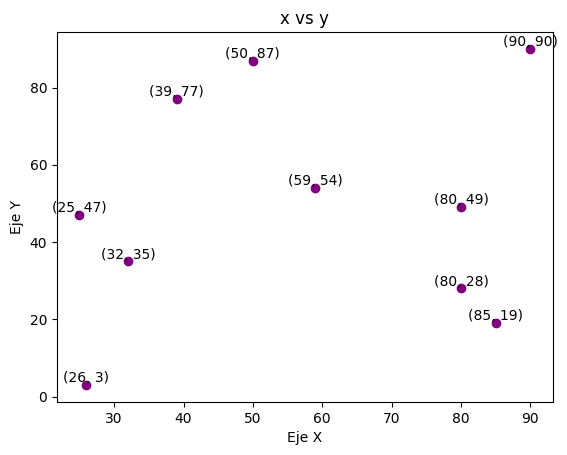

In [53]:
# Randoms x and y
x = np.random.randint(low=1,high=101,size=10)
y = np.random.randint(low=1,high=101,size=10)

plt.scatter(x, y, color="purple")

# Títulos
plt.title('x vs y')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Etiquetas en cada punto
for i in range(len(x)):
    plt.text(x[i], y[i], f'({x[i]}, {y[i]})', ha='center', va='bottom')   # ha='center' alinea horizontalmente el texto en el centro del punto
                                                                          # va='bottom' lo alinea verticalmente en la parte inferior del punto

# Mostrar el gráfico
plt.show()

### (f) Load a CSV file into a DataFrame and then create a line chart of one of the columns in the DataFrame.

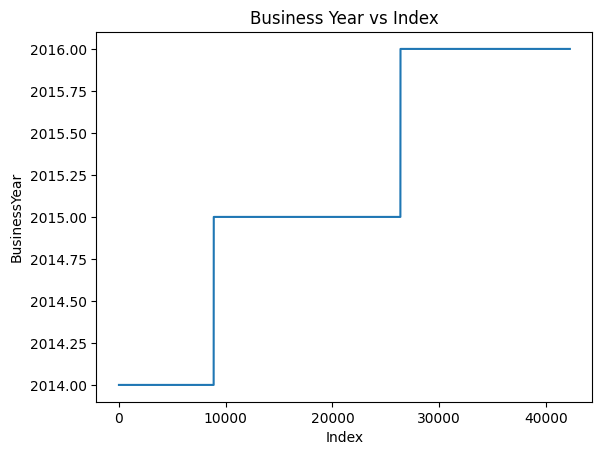

In [54]:
# Load a CSV file into a DataFrame
file = pd.read_csv('/kaggle/input/ServiceArea/ServiceArea.csv')
# file = pd.read_csv('../Hands-On-01/data/ServiceArea.csv')     # ruta en GitHub

# Create a line chart of one of the columns in the DataFrame
plt.plot(file['BusinessYear'])

plt.title('Business Year vs Index')
plt.xlabel('Index')
plt.ylabel('BusinessYear')

plt.show()

## 3. Data Import
### The Echocardiogram data set in the UCI Machine Learning repository contains information on a set of patients that suffered heart attacks at some point in the past.¶

### (a) Download the Echocardiogram data set and import it to a data frame. Read the information on the data set and find out how missing values are represented and make sure that they are properly represented.

In [58]:
# Import Echocardiogram data set to a data frame
echocard = pd.read_csv('/kaggle/input/echocardiogramdata/echocardiogram.data')
# echocard = pd.read_csv('../Hands-On-01/data/echocardiogram.data')     # ruta en GitHub
echocard

,11,0,71,0.1,0.260,9,4.600,14,1,1.1,name,1.2,0.2
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
127,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
128,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
129,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


In [59]:
# Find out how missing values are represented    # ->     se representan con NaN (Not a Number)

# De acuerdo a echocardiogram.names, apartado 8.Missing Attribute Values: (denoted by "?"):
echocard = pd.read_csv('/kaggle/input/echocardiogramdata/echocardiogram.data', na_values="?")
# echocard = pd.read_csv('../Hands-On-01/data/echocardiogram.data', na_values="?")     # ruta en GitHub
echocard

,11,0,71,0.1,0.260,9,4.600,14,1,1.1,name,1.2,0.2
0,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.700,0.588,name,1.0,0.0
1,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.000,1.000,name,1.0,0.0
2,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.450,0.788,name,1.0,0.0
3,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.250,0.571,name,1.0,0.0
4,26.0,0.0,68.0,0.0,0.260,5.000,4.310,12.0,1.000,0.857,name,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1.0,64.0,0.0,0.240,12.900,4.720,12.0,1.000,0.857,name,NaN,NaN
127,41.0,0.0,64.0,0.0,0.280,5.400,5.470,11.0,1.100,0.714,name,NaN,NaN
128,36.0,0.0,69.0,0.0,0.200,7.000,5.050,14.5,1.210,0.857,name,NaN,NaN
129,22.0,0.0,57.0,0.0,0.140,16.100,4.360,15.0,1.360,0.786,name,NaN,NaN


### (b) Assign the attributes with meaningful names. You can look for this information on the same webpage.

In [60]:
# Tomado del archivo echocardiogram.names, apartado 7.Attribute Information:
echocard.columns = ['survival (months)', 'still-alive', 'age-at-heart-attack (years)',
                    'pericardial-effusion', 'fractional-shortening', 'E-point septal separation',
                    'left ventricular end-diastolic dimension', 'wall-motion-score',
                    'wall-motion-index', 'mult', 'name of patient', 'group', 'alive-at-1']

# Crear una copia del dataframe original (por si necesito deshacer cambios: echocard = data_original.copy())
data_original = echocard.copy()

echocard

,survival (months),still-alive,age-at-heart-attack (years),pericardial-effusion,fractional-shortening,E-point septal separation,left ventricular end-diastolic dimension,wall-motion-score,wall-motion-index,mult,name of patient,group,alive-at-1
0,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.700,0.588,name,1.0,0.0
1,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.000,1.000,name,1.0,0.0
2,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.450,0.788,name,1.0,0.0
3,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.250,0.571,name,1.0,0.0
4,26.0,0.0,68.0,0.0,0.260,5.000,4.310,12.0,1.000,0.857,name,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1.0,64.0,0.0,0.240,12.900,4.720,12.0,1.000,0.857,name,NaN,NaN
127,41.0,0.0,64.0,0.0,0.280,5.400,5.470,11.0,1.100,0.714,name,NaN,NaN
128,36.0,0.0,69.0,0.0,0.200,7.000,5.050,14.5,1.210,0.857,name,NaN,NaN
129,22.0,0.0,57.0,0.0,0.140,16.100,4.360,15.0,1.360,0.786,name,NaN,NaN


In [61]:
# Tomado del archivo echocardiogram.names, apartado 7.Attribute Information
# Reemplazando valores en columnas con codigos

# columna 2
# 0=dead at end of survival period, 1 means still alive 
echocard['still-alive']=echocard['still-alive'].replace({0:'dead', 1:'alive'})

# columna 4 
# 0=no fluid, 1=fluid
echocard['pericardial-effusion']=echocard['pericardial-effusion'].replace({0:'no fluid', 1:'fluid'})

# columna 13
# 0 means patient was either dead after 1 year or had been followed for less than 1 year
# 1 means patient was alive at 1 year
echocard['alive-at-1']=echocard['alive-at-1'].replace({0:'no', 1:'yes'})

echocard

,survival (months),still-alive,age-at-heart-attack (years),pericardial-effusion,fractional-shortening,E-point septal separation,left ventricular end-diastolic dimension,wall-motion-score,wall-motion-index,mult,name of patient,group,alive-at-1
0,19.0,dead,72.0,no fluid,0.380,6.000,4.100,14.0,1.700,0.588,name,1.0,no
1,16.0,dead,55.0,no fluid,0.260,4.000,3.420,14.0,1.000,1.000,name,1.0,no
2,57.0,dead,60.0,no fluid,0.253,12.062,4.603,16.0,1.450,0.788,name,1.0,no
3,19.0,alive,57.0,no fluid,0.160,22.000,5.750,18.0,2.250,0.571,name,1.0,no
4,26.0,dead,68.0,no fluid,0.260,5.000,4.310,12.0,1.000,0.857,name,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,alive,64.0,no fluid,0.240,12.900,4.720,12.0,1.000,0.857,name,NaN,NaN
127,41.0,dead,64.0,no fluid,0.280,5.400,5.470,11.0,1.100,0.714,name,NaN,NaN
128,36.0,dead,69.0,no fluid,0.200,7.000,5.050,14.5,1.210,0.857,name,NaN,NaN
129,22.0,dead,57.0,no fluid,0.140,16.100,4.360,15.0,1.360,0.786,name,NaN,NaN


### (c) According to that same information, is there any redundant or irrelevant attribute that you can remove? Remove them.

In [62]:
# Tomado del archivo echocardiogram.names, apartado 7.Attribute Information:
# columna 10. mult -- a derivate var which can be ignored
# columna 11. name -- the name of the patient (I have replaced them with "name")
# columna 12. group -- meaningless, ignore it

# Identificar atributos redundantes o irrelevantes
atributos_redundantes = ['mult', 'name of patient', 'group']

# Eliminar los atributos redundantes o irrelevantes
echocard = echocard.drop(atributos_redundantes, axis=1)     # axis (0 for rows and 1 for columns)

echocard

,survival (months),still-alive,age-at-heart-attack (years),pericardial-effusion,fractional-shortening,E-point septal separation,left ventricular end-diastolic dimension,wall-motion-score,wall-motion-index,alive-at-1
0,19.0,dead,72.0,no fluid,0.380,6.000,4.100,14.0,1.700,no
1,16.0,dead,55.0,no fluid,0.260,4.000,3.420,14.0,1.000,no
2,57.0,dead,60.0,no fluid,0.253,12.062,4.603,16.0,1.450,no
3,19.0,alive,57.0,no fluid,0.160,22.000,5.750,18.0,2.250,no
4,26.0,dead,68.0,no fluid,0.260,5.000,4.310,12.0,1.000,no
...,...,...,...,...,...,...,...,...,...,...
126,7.5,alive,64.0,no fluid,0.240,12.900,4.720,12.0,1.000,NaN
127,41.0,dead,64.0,no fluid,0.280,5.400,5.470,11.0,1.100,NaN
128,36.0,dead,69.0,no fluid,0.200,7.000,5.050,14.5,1.210,NaN
129,22.0,dead,57.0,no fluid,0.140,16.100,4.360,15.0,1.360,NaN


### (d) Is there any data type change that you find useful? Perform it.

In [63]:
# Cambiar decimales a enteros en columnas de fecha (indican meses o años)
echocard['survival (months)'] = echocard['survival (months)'].astype(int)
echocard['age-at-heart-attack (years)'] = echocard['age-at-heart-attack (years)'].astype(int)

echocard

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [75]:
# Crear un dataframe de ejemplo con una columna decimal que contiene NaN
df = pd.DataFrame({'Decimal': [1.5, 2.7, np.nan, 4.2, 5.9]})

# Rellenar los valores NaN con un valor que no se convertirá en entero, como -1
df['Decimal'] = df['Decimal'].fillna(0)

# Convertir los valores no nulos a enteros
df['Decimal'] = df['Decimal'].astype(int)

# Volver a establecer los valores NaN en la columna
df['Decimal'] = df['Decimal'].replace(0, np.nan)

# Imprimir el dataframe actualizado
print(df)

   Decimal
0      1.0
1      2.0
2      NaN
3      4.0
4      5.0
